In [172]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
df = pd.read_csv('adult_train.csv')
print (df)

       Age          Workclass  fnlwgt    Education  Education_Num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            Martial_Status          Occupation    Relationship    Race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Martial_Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Country         31978 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [17]:
print(df.columns)

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education_Num',
       'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_Gain', 'Capital_Loss', 'Hours_per_week', 'Country', 'Target'],
      dtype='object')


In [83]:
print(df.describe)

<bound method NDFrame.describe of        Age          Workclass  fnlwgt      Education       Martial_Status  \
23178   47   Self-emp-not-inc  126500        7th-8th   Married-civ-spouse   
26946   50            Private  129956        HS-grad   Married-civ-spouse   
17656   38            Private  209609   Some-college   Married-civ-spouse   
14387   24        Federal-gov  127185     Assoc-acdm   Married-civ-spouse   
21999   25            Private   69847      Bachelors        Never-married   
...    ...                ...     ...            ...                  ...   
13477   34            Private  168768     Assoc-acdm        Never-married   
8712    40            Private  187164        HS-grad   Married-civ-spouse   
10054   35            Private  346766        HS-grad        Never-married   
7081    46            Private  169042           10th        Never-married   
3008    26            Private   96130        HS-grad        Never-married   

               Occupation     Relationshi

In [18]:
%matplotlib inline

[[<AxesSubplot:title={'center':'Age'}>
  <AxesSubplot:title={'center':'fnlwgt'}>]
 [<AxesSubplot:title={'center':'Education_Num'}>
  <AxesSubplot:title={'center':'Capital_Gain'}>]
 [<AxesSubplot:title={'center':'Capital_Loss'}>
  <AxesSubplot:title={'center':'Hours_per_week'}>]]


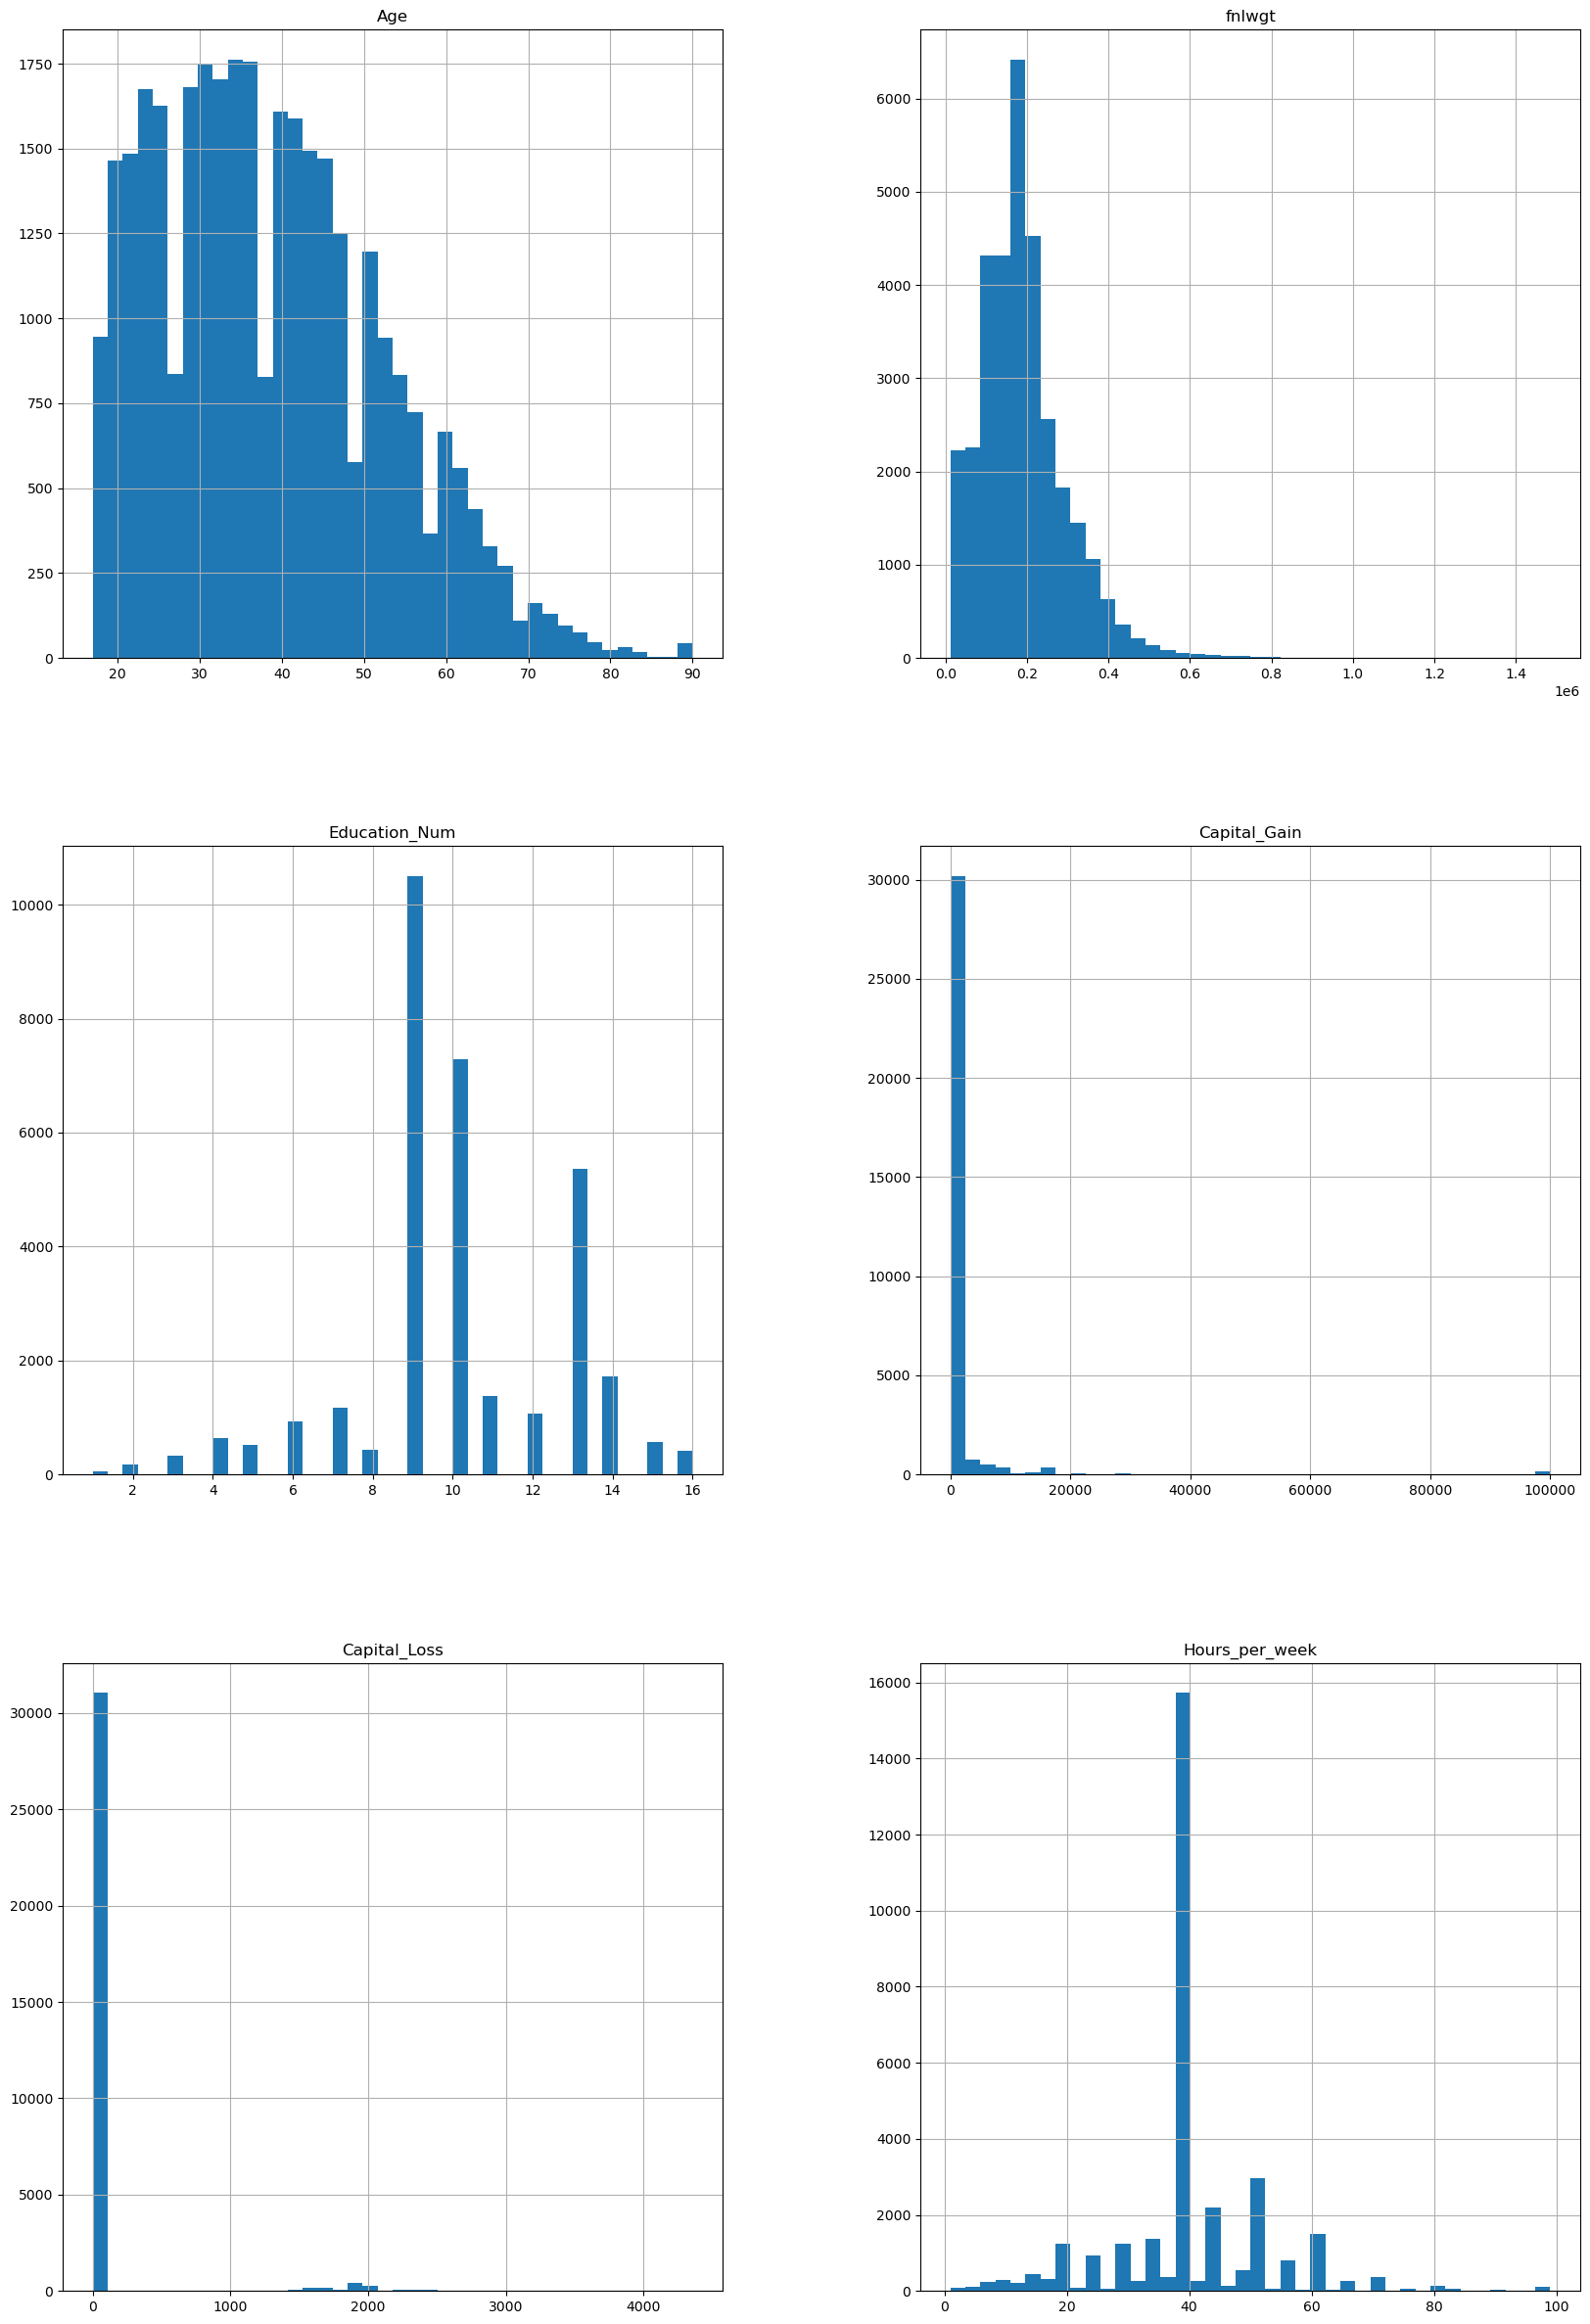

In [25]:
print(df.hist(bins=40,figsize=(20,30)))
plt.show();

In [26]:

def split_train_test(df,test_ratio,random_state=42):
    np.random.seed(random_state)
    shuffled_indices = np.random.permutation(len(df))
    test_set_size = int(test_ratio * len(df))
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return df.iloc[train_indices],df.iloc[test_indices]

train_set,test_set = split_train_test(df,0.2)
print("Train set length:", len(train_set))
print("Test set length:", len(test_set))

Train set length: 26049
Test set length: 6512


In [27]:
from zlib import crc32
def test_set_check(identifier,test_ratio):
    return crc32(np.int64(identifier) & 0xffffffff) < test_ratio

def split_train_test_by_id(df,test_ratio,id_column):
    ids = df[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_,test_ratio))
    return df.loc[~in_test_set],df.loc[in_test_set]

In [28]:
df_with_id = df.reset_index()
train_set,test_set = split_train_test_by_id(df_with_id,0.2,"index")

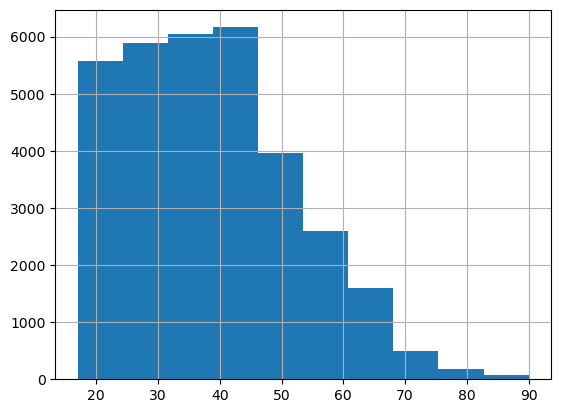

In [29]:
df['Age'].hist();

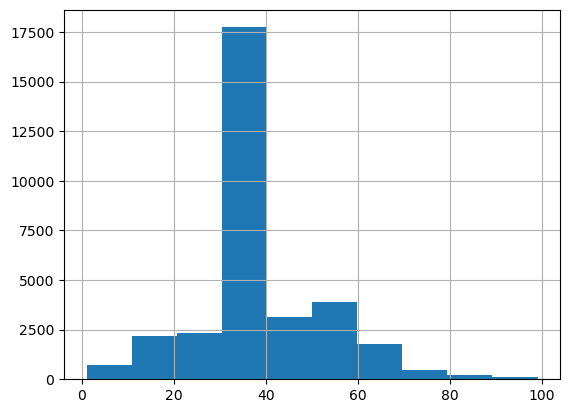

In [30]:
df['Hours_per_week'].hist();

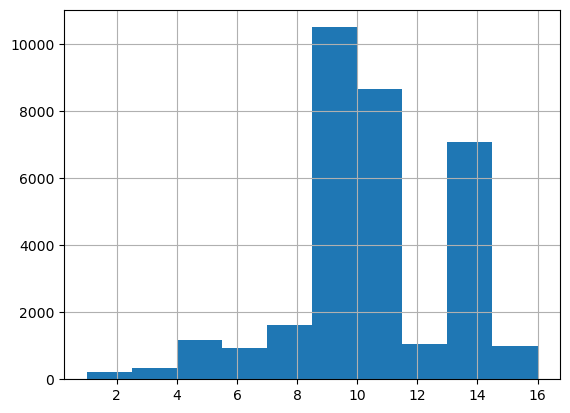

In [31]:
df['Education_Num'].hist();

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit
# или train_test_split с параметром stratify
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)
for train_index, test_index in split.split(df,df['Education_Num']):
    print(train_index)
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

[23178 26946 17656 ... 10054  7081  3008]


In [33]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("Education_Num",axis=1,inplace=True)

In [34]:
df = strat_train_set.copy()

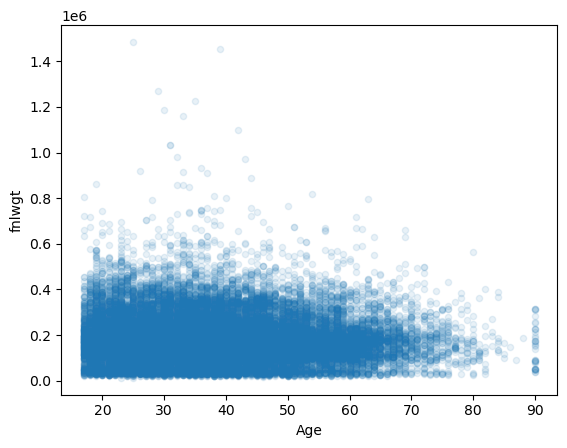

In [48]:
#диаграмма рассеяния
df.plot(kind='scatter',x='Age',y = 'fnlwgt',alpha = 0.1);

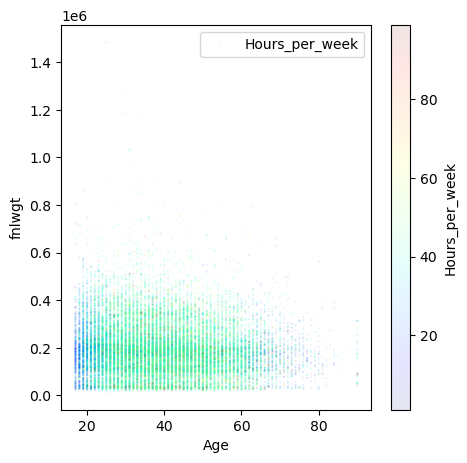

In [55]:
df.plot(kind='scatter',x='Age',y = 'fnlwgt',alpha = 0.1,s=df['Hours_per_week']/100,label='Hours_per_week',figsize=(5,5),c='Hours_per_week',cmap = plt.get_cmap('jet'),colorbar=True)
plt.legend()

In [60]:
import seaborn as sns

<AxesSubplot:ylabel='Hours_per_week'>

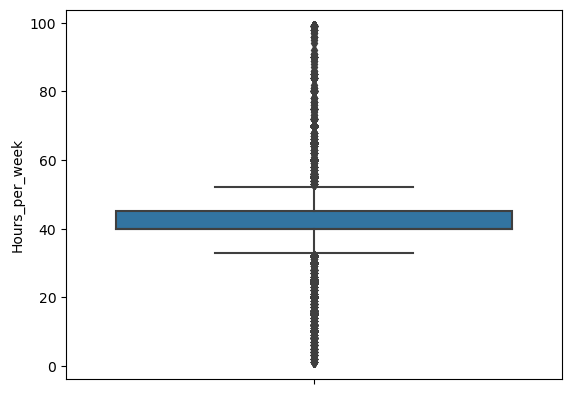

In [68]:
sns.boxplot(y = 'Hours_per_week', data= df)

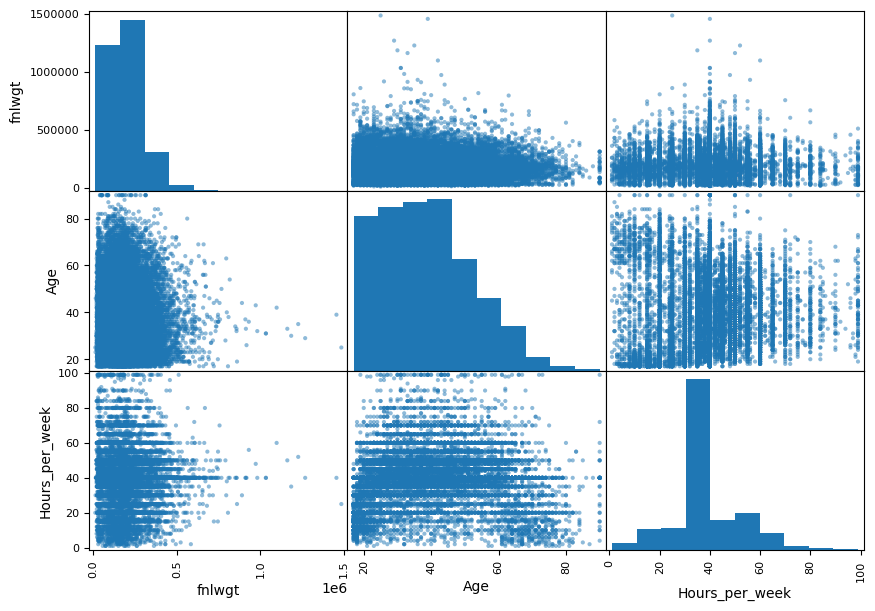

In [69]:
from pandas.plotting import scatter_matrix

attributes = ['fnlwgt','Age','Hours_per_week']
scatter_matrix(df[attributes],figsize=(10,7));

In [70]:
import seaborn as sns

<AxesSubplot:xlabel='Capital_Gain', ylabel='Hours_per_week'>

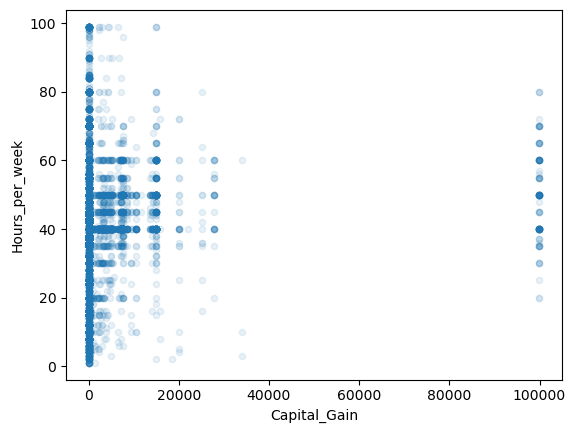

In [71]:
df.plot(kind='scatter',x='Capital_Gain',y='Hours_per_week',alpha=0.1)

In [72]:
corr_matrix = df.corr()
corr_matrix['Hours_per_week'].sort_values(ascending=False)

Hours_per_week    1.000000
Capital_Gain      0.076387
Age               0.064433
Capital_Loss      0.056463
fnlwgt           -0.018978
Name: Hours_per_week, dtype: float64

In [73]:
# убрать объекты выборки с пропусками
df.dropna(subset=['Capital_Gain'])
# убрать признак
df.drop('Capital_Gain',axis = 1)
# замена медианой
median = df['Capital_Gain'].median()
df.Capital_Gain.fillna(median,inplace=True)

In [74]:
df_category = df[['Country']]
df_category

,Country
23178,Puerto-Rico
26946,United-States
17656,United-States
14387,United-States
21999,United-States
...,...
13477,United-States
8712,United-States
10054,United-States
7081,Ecuador


In [75]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [76]:
category_encoded = ordinal_encoder.fit_transform(df_category)
category_encoded[:10]

array([[31.],
       [37.],
       [37.],
       [37.],
       [37.],
       [37.],
       [37.],
       [37.],
       [37.],
       [37.]])

In [77]:
ordinal_encoder.categories_

[array([' Cambodia', ' Canada', ' China', ' Columbia', ' Cuba',
        ' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England',
        ' France', ' Germany', ' Greece', ' Guatemala', ' Haiti',
        ' Honduras', ' Hong', ' Hungary', ' India', ' Iran', ' Ireland',
        ' Italy', ' Jamaica', ' Japan', ' Laos', ' Mexico', ' Nicaragua',
        ' Outlying-US(Guam-USVI-etc)', ' Peru', ' Philippines', ' Poland',
        ' Portugal', ' Puerto-Rico', ' Scotland', ' South', ' Taiwan',
        ' Thailand', ' Trinadad&Tobago', ' United-States', ' Vietnam',
        ' Yugoslavia', nan], dtype=object)]

In [78]:
from sklearn.preprocessing import OneHotEncoder
onehotEnconder = OneHotEncoder()
df_category_one_hot = onehotEnconder.fit_transform(df_category)
df_category_one_hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [86]:
from sklearn.linear_model import LinearRegression
df = pd.read_csv('adult_train.csv')
df

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


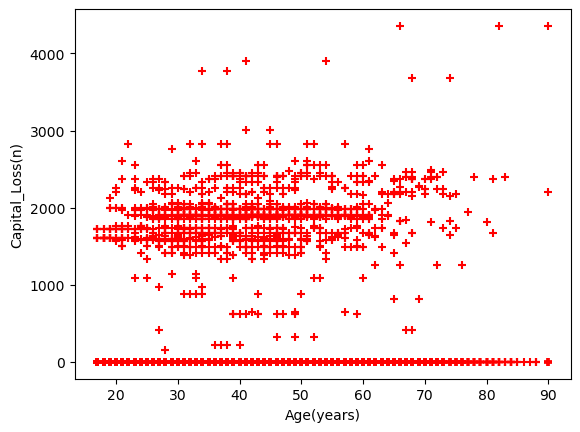

In [137]:
%matplotlib inline
plt.xlabel('Age(years)')
plt.ylabel('Capital_Loss(n)')
plt.scatter(df.Age, df.Capital_Loss, color='red', marker='+')

In [138]:
reg = np.polyfit(df['Age'], df['Capital_Loss'], deg=1)
reg

array([ 1.7067524 , 21.45451136])

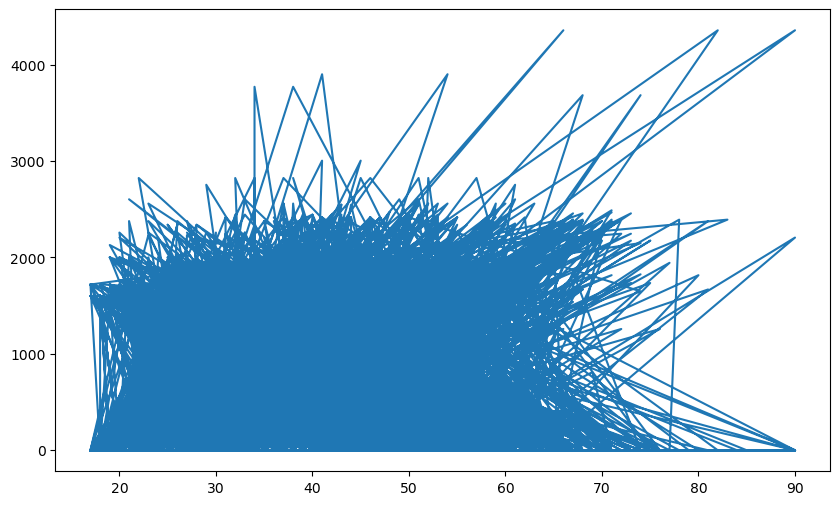

In [147]:
trend = np.polyval(reg, df['Age'][90:])
std = df['Capital_Loss'][-30:].std()
plt.figure(figsize=(10,6))
plt.plot(df['Age'], df['Capital_Loss'], label="S&P500")

In [149]:
predict = np.poly1d(reg)
predict(254)

454.9696221331933

In [152]:
df.shape

(32561, 15)

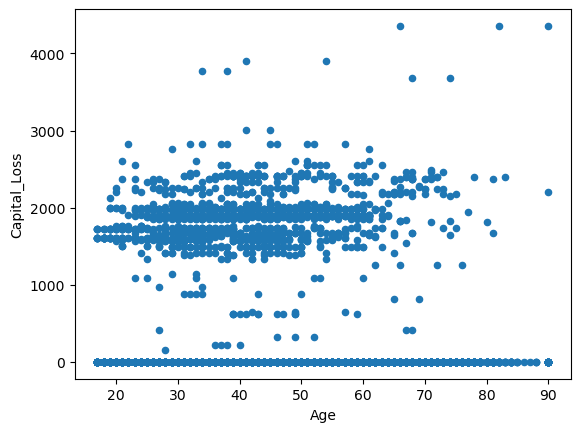

In [153]:
df.plot(kind='scatter', x='Age', y='Capital_Loss')
plt.show()

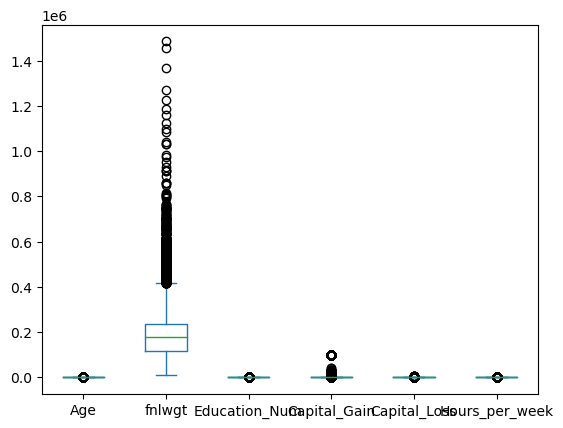

In [154]:
df.plot(kind='box')
plt.show()

In [155]:
df.corr()

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
Education_Num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
Capital_Gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
Capital_Loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
Hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [13]:
import numpy as np
import pandas as pd

In [14]:
df = pd.read_csv('adult_train.csv')
df.head

<bound method NDFrame.head of        Age          Workclass  fnlwgt    Education  Education_Num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            Martial_Status          Occupation    Relationship    Race  \
0            Never-married        Adm-clerical   Not-in-family   Wh

In [19]:
X = df.iloc[:, :10].values
Y = df.iloc[:, 10].values.reshape(-1,1)

In [20]:
print(np.shape(X))
print(np.shape(Y))

(32561, 10)
(32561, 1)


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state=2021)

In [30]:
X_train.shape

(26048, 10)

In [32]:
Y_train.shape

(26048, 1)

In [46]:
from sklearn.model_selection import KFold
folds = KFold(n_splits = 8, shuffle = True, random_state = 100)

In [47]:
hyper_params = [{'n_features_to_select':list(range(1,18))}]

In [48]:
from sklearn.feature_selection import RFE
rfe = RFE(lm)
from sklearn.model_selection import GridSearchCV
modelcv = GridSearchCV(estimator = rfe,
                      param_grid = hyper_params,
                      scoring = 'r2',
                      cv = folds,
                      verbose = 1,
                      return_train_score = True)
modelcv.fit(X_train, Y_train)

Fitting 8 folds for each of 17 candidates, totalling 136 fits


C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
136 fits failed out of a total of 136.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
119 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\feature_selection\_rfe.py", line 222, in fit
    return self._fit(X, y, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\feature_selection\_rfe.py", line 231, in _fit
    X, y = self._validate_data(
  File "C:\Anaconda\lib\site-packages\sklearn\base.py", line 581, in _validat

ValueError: could not convert string to float: ' Some-college'

In [49]:
cvresults = pd.DataFrame(modelcv.cv_results_)
cvresults

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [55]:
from sklearn.svm import SVR

In [58]:
regressor=SVR(kernel='rbf')